In [28]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.svm import SVC

In [29]:
#Importing Libraries
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
#read data
data=pd.read_csv("fake_job_postings.csv")
data
#we will check the shape of the dataset and the top five element 

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [31]:
#shape the data
data.shape

(17880, 18)

In [32]:
#head of the data
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [34]:
data.interpolate(inplace=True)
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [35]:
data.dropna(subset=['description'], inplace=True)

In [36]:
#Delete the unnecessary columns
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del data[col]

In [37]:
  #Fill NaN values with blank space
data.fillna(' ', inplace=True)
data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17879 entries, 0 to 17879
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17879 non-null  object
 1   location             17879 non-null  object
 2   department           17879 non-null  object
 3   company_profile      17879 non-null  object
 4   description          17879 non-null  object
 5   requirements         17879 non-null  object
 6   benefits             17879 non-null  object
 7   required_experience  17879 non-null  object
 8   required_education   17879 non-null  object
 9   industry             17879 non-null  object
 10  function             17879 non-null  object
 11  fraudulent           17879 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


In [39]:
#REAL AND FAKE JOB POSTING VISUALIZATION
data.groupby('fraudulent').count()["title"].reset_index().sort_values(by='title',ascending=False)


#0 is for real job posting
#1 is for fake job posting
#the dataset as more real job posting than fake job posting

,fraudulent,title
0,0,17014
1,1,865


Text(0.5, 1.0, 'real & fake')

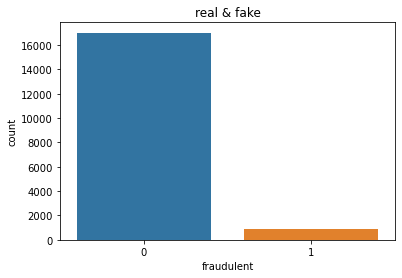

In [41]:
sns.countplot(x='fraudulent',data=data)
plt.title('real & fake')

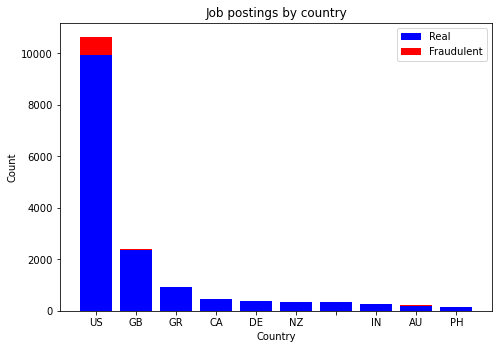

In [42]:
#visualized job posting by country
def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
country = dict(data.country.value_counts()[:11])
del country[' ']

vcountry = data.groupby(['country', 'fraudulent']).size().unstack('fraudulent', fill_value=0)
vcountry = vcountry.sort_values(by=[0, 1], ascending=False)
vcountry_10 = vcountry[:10] # Take top 10 countries

fig = plt.figure()
axi = fig.add_axes([0, 0, 1, 1])
axi.bar(vcountry_10.index, vcountry_10[0], color = 'b')
axi.bar(vcountry_10.index, vcountry_10[1], bottom = vcountry_10[0], color = 'r')
axi.set_ylabel('Count')
axi.set_xlabel('Country')
axi.set_title('Job postings by country')
axi.legend(labels=['Real', 'Fraudulent'])

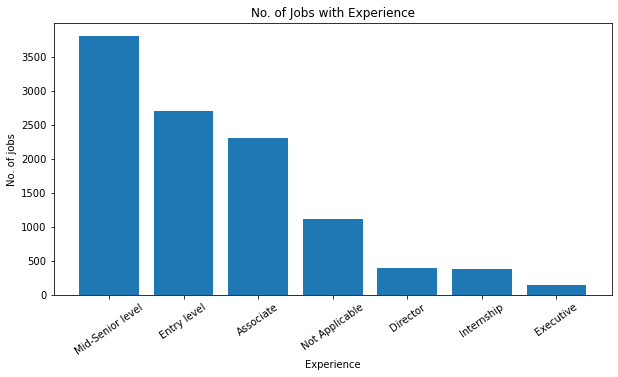

In [43]:

#Visualize the required experiences in the jobs
experience = dict(data.required_experience.value_counts())
del experience[' ']

plt.figure(figsize=(10,5))
#sns.countplot(x=experience.keys(), experience.values(), hue='fraudulent', data=data, palatte='set1')
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [44]:
#Most frequent jobs
print(data.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [45]:
#Titles and count of fraudulent jobs
print(data[data.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [46]:
#Titles and count of real jobs
print(data[data.fraudulent==0].title.value_counts()[:10])


English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [47]:
#combine text in a single column to start cleaning our data
data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']
del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']

In [49]:
data.shape

(17879, 2)

In [48]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


# the model used
naive bayes

In [81]:
y=data.fraudulent

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X=v.fit_transform(data.text)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [77]:
#X_train_count=v.fit_transform(X_train.values)
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train, y_train)
MultinomialNB()

MultinomialNB()

In [78]:

y_predicted=model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_predicted)


0.9679343773303505

In [80]:
metrics.f1_score(y_test,y_predicted)

0.5981308411214954

In [90]:
print(y_test)

10899    0
3860     0
6190     0
11967    0
11229    0
        ..
3140     0
13624    0
12789    0
9765     0
2687     0
Name: fraudulent, Length: 5364, dtype: int64


In [91]:
# Predicting with a test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

Classification Accuracy: 0.9679343773303505
Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5118
           1       0.70      0.52      0.60       246

    accuracy                           0.97      5364
   macro avg       0.84      0.75      0.79      5364
weighted avg       0.96      0.97      0.97      5364

Confusion Matrix

[[5064   54]
 [ 118  128]]


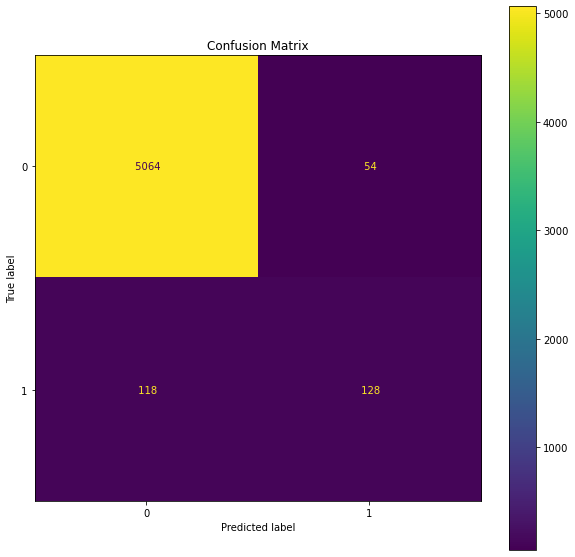

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test, values_format=' ', ax=ax) 
plt.title('Confusion Matrix')
plt.show()